In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [59]:
## Load the dataset
data=pd.read_csv("customerData.csv")
data.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,CustomerTenureYears,PreferredDevice,Region,LastPurchaseDaysAgo,SessionCount,ReferralSource,CustomerSegment,CustomerSatisfaction
0,46,Female,68115.954405,15,Furniture,31.298111,0,2,0,0.0,Mobile,North,15,2,Email,Premium,3
1,18,Female,103651.582409,11,Fashion,15.823095,0,4,1,0.2,Mobile,South,16,2,Organic,Premium,4
2,25,Female,22923.195828,13,Groceries,27.895004,1,4,1,4.9,Desktop,West,6,2,Organic,Premium,4
3,56,Male,109985.107830,10,Electronics,24.624142,0,7,1,2.1,Desktop,West,21,4,Paid Ads,Premium,4
4,64,Male,146719.826876,0,Fashion,0.922515,0,4,0,1.7,Mobile,West,79,2,Organic,VIP,3


In [60]:
# df=data
# # Map gender values: 0 → Female, 1 → Male
# df["ProductCategory"] = df["ProductCategory"].map({0: "Electronics", 1: "Fashion", 2: "Groceries", 3: "Furniture", 4: "Kitchen", 5: "Stationary", 6: "Gifts"})

# df 

# # Save the updated file
# df.to_csv("customer_purchase_data_expanded_50000_gender_fixed.csv", index=False)

In [61]:
## Preprocess the data
### Drop irrelevant columns
# data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
# data

In [62]:
## Encode categorical variables
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])
data

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,CustomerTenureYears,PreferredDevice,Region,LastPurchaseDaysAgo,SessionCount,ReferralSource,CustomerSegment,CustomerSatisfaction
0,46,0,68115.954405,15,Furniture,31.298111,0,2,0,0.0,Mobile,North,15,2,Email,Premium,3
1,18,0,103651.582409,11,Fashion,15.823095,0,4,1,0.2,Mobile,South,16,2,Organic,Premium,4
2,25,0,22923.195828,13,Groceries,27.895004,1,4,1,4.9,Desktop,West,6,2,Organic,Premium,4
3,56,1,109985.107830,10,Electronics,24.624142,0,7,1,2.1,Desktop,West,21,4,Paid Ads,Premium,4
4,64,1,146719.826876,0,Fashion,0.922515,0,4,0,1.7,Mobile,West,79,2,Organic,VIP,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,32,0,46705.776115,6,Electronics,22.023544,0,3,1,1.2,Mobile,North,3,1,Email,Regular,4
49996,64,0,108059.877272,9,Furniture,42.641994,0,5,1,1.9,Desktop,North,12,1,Email,Premium,4
49997,31,0,57137.113053,5,Furniture,6.355491,1,1,0,0.4,Desktop,South,87,1,Social,Regular,3
49998,37,0,165358.777122,18,Fashion,36.396076,0,4,1,0.2,Tablet,East,21,2,Organic,VIP,4


In [63]:
## Onehot encode 'Geography
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_product=OneHotEncoder()
onehot_encoder_device=OneHotEncoder()
onehot_encoder_region=OneHotEncoder()
onehot_encoder_source=OneHotEncoder()
onehot_encoder_segment=OneHotEncoder()

product_encoder=onehot_encoder_product.fit_transform(data[['ProductCategory']]).toarray()
device_encoder=onehot_encoder_device.fit_transform(data[['PreferredDevice']]).toarray()
region_encoder=onehot_encoder_region.fit_transform(data[['Region']]).toarray()
source_encoder=onehot_encoder_source.fit_transform(data[['ReferralSource']]).toarray()
segment_encoder=onehot_encoder_segment.fit_transform(data[['CustomerSegment']]).toarray()

In [64]:
product_encoder

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [65]:
onehot_encoder_product.get_feature_names_out(['ProductCategory'])

array(['ProductCategory_Electronics', 'ProductCategory_Fashion',
       'ProductCategory_Furniture', 'ProductCategory_Groceries',
       'ProductCategory_Kitchen'], dtype=object)

In [66]:
product_encoded_df=pd.DataFrame(product_encoder,columns=onehot_encoder_product.get_feature_names_out(['ProductCategory']))
product_encoded_df

,ProductCategory_Electronics,ProductCategory_Fashion,ProductCategory_Furniture,ProductCategory_Groceries,ProductCategory_Kitchen
0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
49995,1.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,1.0,0.0,0.0
49997,0.0,0.0,1.0,0.0,0.0
49998,0.0,1.0,0.0,0.0,0.0


In [67]:
device_encoded_df=pd.DataFrame(device_encoder,columns=onehot_encoder_device.get_feature_names_out(['PreferredDevice']))
region_encoded_df=pd.DataFrame(region_encoder,columns=onehot_encoder_region.get_feature_names_out(['Region']))
source_encoded_df=pd.DataFrame(source_encoder,columns=onehot_encoder_source.get_feature_names_out(['ReferralSource']))
segment_encoded_df=pd.DataFrame(segment_encoder,columns=onehot_encoder_segment.get_feature_names_out(['CustomerSegment']))


In [68]:
## Combine one hot encoder columns with the original data
data=pd.concat([data.drop(['ProductCategory','PreferredDevice','Region','ReferralSource','CustomerSegment'],axis=1),product_encoded_df,device_encoded_df,region_encoded_df,source_encoded_df,segment_encoded_df],axis=1)
data.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,CustomerTenureYears,LastPurchaseDaysAgo,...,Region_South,Region_West,ReferralSource_Email,ReferralSource_Organic,ReferralSource_Paid Ads,ReferralSource_Referral,ReferralSource_Social,CustomerSegment_Premium,CustomerSegment_Regular,CustomerSegment_VIP
0,46,0,68115.954405,15,31.298111,0,2,0,0.0,15,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,18,0,103651.582409,11,15.823095,0,4,1,0.2,16,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,25,0,22923.195828,13,27.895004,1,4,1,4.9,6,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,56,1,109985.107830,10,24.624142,0,7,1,2.1,21,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,64,1,146719.826876,0,0.922515,0,4,0,1.7,79,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
data.to_csv("customerDataNew.csv", index=False)

In [70]:
## Save the encoders and sscaler
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_product.pkl','wb') as file:
    pickle.dump(onehot_encoder_product,file)

with open('onehot_encoder_device.pkl','wb') as file:
    pickle.dump(onehot_encoder_device,file)

with open('onehot_encoder_region.pkl','wb') as file:
    pickle.dump(onehot_encoder_region,file)

with open('onehot_encoder_source.pkl','wb') as file:
    pickle.dump(onehot_encoder_source,file)

with open('onehot_encoder_segment.pkl','wb') as file:
    pickle.dump(onehot_encoder_segment,file)


In [71]:
## DiVide the dataset into indepent and dependent features
X=data.drop('PurchaseStatus',axis=1)
y=data['PurchaseStatus']

## Split the data in training and tetsing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Scale these features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [72]:
X_train

array([[ 0.12871351, -1.01278168, -0.89667663, ...,  1.04936714,
        -0.54155759, -0.65044784],
       [-1.33309136,  0.98737963,  0.04304539, ...,  1.04936714,
        -0.54155759, -0.65044784],
       [-1.2059779 ,  0.98737963,  0.30149728, ...,  1.04936714,
        -0.54155759, -0.65044784],
       ...,
       [ 1.59051838, -1.01278168,  1.04908634, ..., -0.95295532,
        -0.54155759,  1.53740228],
       [-0.25262689, -1.01278168, -0.90969067, ..., -0.95295532,
         1.8465257 , -0.65044784],
       [-0.76108076, -1.01278168, -1.58025782, ...,  1.04936714,
        -0.54155759, -0.65044784]])

In [73]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [74]:
data

,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,CustomerTenureYears,LastPurchaseDaysAgo,...,Region_South,Region_West,ReferralSource_Email,ReferralSource_Organic,ReferralSource_Paid Ads,ReferralSource_Referral,ReferralSource_Social,CustomerSegment_Premium,CustomerSegment_Regular,CustomerSegment_VIP
0,46,0,68115.954405,15,31.298111,0,2,0,0.0,15,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,18,0,103651.582409,11,15.823095,0,4,1,0.2,16,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,25,0,22923.195828,13,27.895004,1,4,1,4.9,6,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,56,1,109985.107830,10,24.624142,0,7,1,2.1,21,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,64,1,146719.826876,0,0.922515,0,4,0,1.7,79,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,32,0,46705.776115,6,22.023544,0,3,1,1.2,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49996,64,0,108059.877272,9,42.641994,0,5,1,1.9,12,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49997,31,0,57137.113053,5,6.355491,1,1,0,0.4,87,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
49998,37,0,165358.777122,18,36.396076,0,4,1,0.2,21,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Training the ANN Model

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [76]:
(X_train.shape[1],)

(31,)

In [77]:
## Build Our ANN Model
model=Sequential([
    Dense(128,activation='relu',input_shape=(X_train.shape[1],)), ## HL1 Connected wwith input layer
    Dense(64,activation='relu'), ## HL2
    Dense(32,activation='relu'), ## HL3
    Dense(1,activation='sigmoid')  ## output layer
]

)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,465 (56.50 KB)

 Trainable params: 14,465 (56.50 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()
loss

In [80]:
## compile the model
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

In [81]:
## Set up the Tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [82]:
## Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)


In [83]:
### Train the model
history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9250 - loss: 0.1814 - val_accuracy: 0.9496 - val_loss: 0.1184
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9498 - loss: 0.1253 - val_accuracy: 0.9504 - val_loss: 0.1218
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9533 - loss: 0.1183 - val_accuracy: 0.9535 - val_loss: 0.1040
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9541 - loss: 0.1123 - val_accuracy: 0.9548 - val_loss: 0.1115
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9558 - loss: 0.1129 - val_accuracy: 0.9535 - val_loss: 0.1151
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9564 - loss: 0.1095 - val_accuracy: 0.9558 - val_loss: 0.1044
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9585 - loss: 0.1039 - val_accuracy: 0.9552 - val_loss: 0.1016
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9565 - 

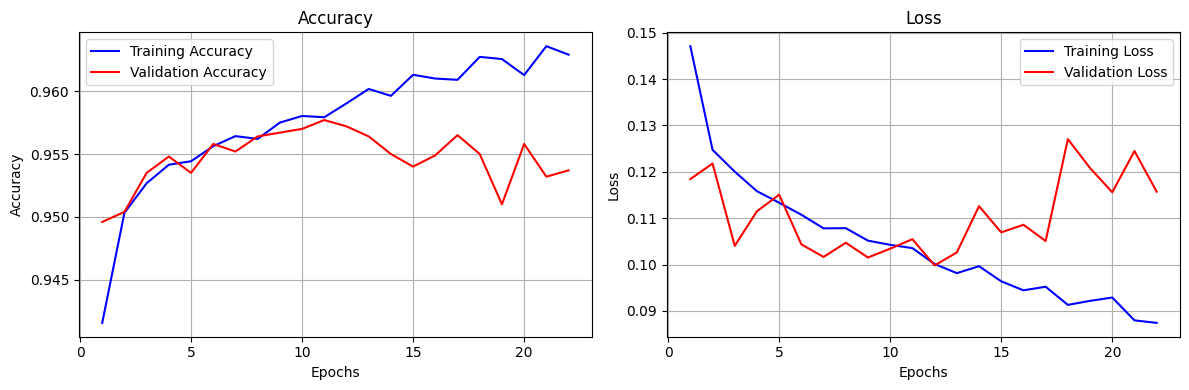

In [87]:
import matplotlib.pyplot as plt

# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Create subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # width=12, height=4 → smaller size

# Plot Accuracy
ax1.plot(epochs, acc, 'b-', label='Training Accuracy')
ax1.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot Loss
ax2.plot(epochs, loss, 'b-', label='Training Loss')
ax2.plot(epochs, val_loss, 'r-', label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In [88]:
model.save('purchasePredictionModel.h5')

### PREDICTING

In [89]:
from tensorflow.keras.models import load_model

In [90]:
### Load the trained model, scaler pickle,onehot
model=load_model('purchasePredictionModel.h5')

## load the encoder and scaler
with open('onehot_encoder_product.pkl','rb') as file:
    onehot_encoder_product=pickle.load(file)

with open('onehot_encoder_device.pkl','rb') as file:
    onehot_encoder_device=pickle.load(file)

with open('onehot_encoder_region.pkl','rb') as file:
    onehot_encoder_region=pickle.load(file)

with open('onehot_encoder_segment.pkl','rb') as file:
    onehot_encoder_segment=pickle.load(file)

with open('onehot_encoder_source.pkl','rb') as file:
    onehot_encoder_source=pickle.load(file)

with open('label_encoder_gender.pkl', 'rb') as file:
    label_encoder_gender = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

In [96]:
# Example input matching your dataset schema
input_data = {
    "Age": 35,
    "Gender": "Male",
    "AnnualIncome": 75000,
    "NumberOfPurchases": 12,
    "ProductCategory": "Electronics",
    "TimeSpentOnWebsite": 42.5,
    "LoyaltyProgram": 1,
    "DiscountsAvailed": 3,
    "CustomerTenureYears": 2.4,
    "PreferredDevice": "Mobile",
    "Region": "South",
    "LastPurchaseDaysAgo": 15,
    "SessionCount": 5,
    "ReferralSource": "Organic",
    "CustomerSegment": "Premium",
    "CustomerSatisfaction": 4
}


In [97]:
# One-hot encode 'ProductCategory'
product_encoded = onehot_encoder_product.transform([[input_data['ProductCategory']]]).toarray()
device_encoded = onehot_encoder_device.transform([[input_data['PreferredDevice']]]).toarray()
region_encoded = onehot_encoder_region.transform([[input_data['Region']]]).toarray()
source_encoded = onehot_encoder_source.transform([[input_data['ReferralSource']]]).toarray()
segment_encoded = onehot_encoder_segment.transform([[input_data['CustomerSegment']]]).toarray()


product_encoded_df = pd.DataFrame(product_encoded, columns=onehot_encoder_product.get_feature_names_out(['ProductCategory']))
device_encoded_df = pd.DataFrame(device_encoded, columns=onehot_encoder_device.get_feature_names_out(['PreferredDevice']))
region_encoded_df = pd.DataFrame(region_encoded, columns=onehot_encoder_region.get_feature_names_out(['Region']))
source_encoded_df = pd.DataFrame(source_encoded, columns=onehot_encoder_source.get_feature_names_out(['ReferralSource']))
segment_encoded_df = pd.DataFrame(segment_encoded, columns=onehot_encoder_segment.get_feature_names_out(['CustomerSegment']))

product_encoded_df


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid 

,ProductCategory_Electronics,ProductCategory_Fashion,ProductCategory_Furniture,ProductCategory_Groceries,ProductCategory_Kitchen
0,1.0,0.0,0.0,0.0,0.0


In [98]:
device_encoded_df

,PreferredDevice_Desktop,PreferredDevice_Mobile,PreferredDevice_Tablet
0,0.0,1.0,0.0


In [99]:
input_df=pd.DataFrame([input_data])
input_df

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,CustomerTenureYears,PreferredDevice,Region,LastPurchaseDaysAgo,SessionCount,ReferralSource,CustomerSegment,CustomerSatisfaction
0,35,Male,75000,12,Electronics,42.5,1,3,2.4,Mobile,South,15,5,Organic,Premium,4


In [100]:
## Encode categorical variables
input_df['Gender']=label_encoder_gender.transform(input_df['Gender'])
input_df

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,CustomerTenureYears,PreferredDevice,Region,LastPurchaseDaysAgo,SessionCount,ReferralSource,CustomerSegment,CustomerSatisfaction
0,35,1,75000,12,Electronics,42.5,1,3,2.4,Mobile,South,15,5,Organic,Premium,4


In [101]:
## concatination one hot encoded 
input_df=pd.concat([input_df.drop(['ProductCategory','PreferredDevice','Region','ReferralSource','CustomerSegment'],axis=1),product_encoded_df,device_encoded_df,region_encoded_df,source_encoded_df,segment_encoded_df],axis=1)
input_df

,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,CustomerTenureYears,LastPurchaseDaysAgo,SessionCount,...,Region_South,Region_West,ReferralSource_Email,ReferralSource_Organic,ReferralSource_Paid Ads,ReferralSource_Referral,ReferralSource_Social,CustomerSegment_Premium,CustomerSegment_Regular,CustomerSegment_VIP
0,35,1,75000,12,42.5,1,3,2.4,15,5,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [102]:
## Scaling the input data
input_scaled=scaler.transform(input_df)
input_scaled

array([[-0.57041056,  0.98737963, -0.25476731,  0.10167139,  0.67983541,
         1.23869788, -0.08056008,  0.11164941, -0.82312774,  1.77440169,
         0.94447097,  2.03018199, -0.53568636, -0.48262988, -0.46518494,
        -0.52326305, -0.67408219,  0.91292532, -0.40706874, -0.49291932,
        -0.57188456,  1.34176602, -0.50152298, -0.42103085,  1.19040517,
        -0.53622741, -0.29578446, -0.38983868,  1.04936714, -0.54155759,
        -0.65044784]])

In [103]:
## Predict churn
prediction=model.predict(input_scaled)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


array([[0.99810374]], dtype=float32)

In [104]:
prediction_proba = prediction[0][0]

prediction_proba

0.99810374

In [106]:
if prediction_proba > 0.5:
    print('The customer is likely to make a purchase.')
else:
    print('The customer is not likely to make a purchase.')

The customer is likely to make a purchase.
